In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

In [3]:
#load the data file 
data = Path('clean_train.csv')
titanic_df = pd.read_csv(data)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [4]:
# Segment the features from the target
X = titanic_df.drop("Survived", axis=1)
y = titanic_df['Survived']

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [8]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the random forest classifier instance
titanic_rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [10]:
# Fit the model
titanic_rf_model = titanic_rf_model.fit(X_train_scaled, y_train)

In [11]:
# Making predictions using the testing data
rf_predictions = titanic_rf_model.predict(X_test_scaled)

In [12]:
# Calculate the confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_cm_df = pd.DataFrame(
    rf_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)


In [13]:
# Calculating the accuracy score

acc_score = accuracy_score(y_test, rf_predictions)

In [18]:
# Displaying results
print("Confusion Matrix")
display(rf_cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,117,26
Actual 1,17,63


Accuracy Score : 0.8071748878923767
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       143
           1       0.71      0.79      0.75        80

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



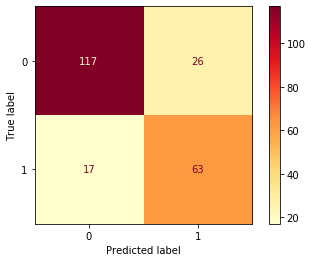

In [21]:
plot_confusion_matrix(titanic_rf_model, X_test_scaled, y_test, cmap = 'YlOrRd')  

C:\Users\cjohn\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


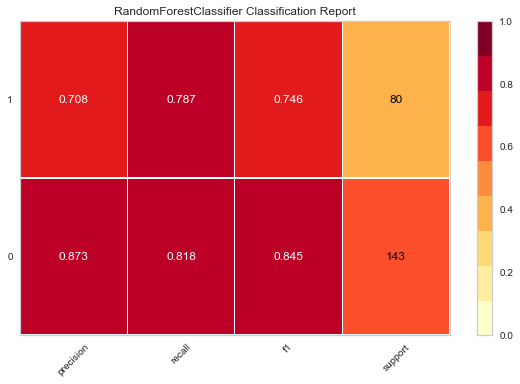

In [24]:
#visualize the classification report 
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(titanic_rf_model, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
   

## Feature Importance 

In [15]:
# Get the feature importance array
importances = titanic_rf_model.feature_importances_

In [16]:
# List the features from most to least important
importances_sorted = sorted(zip(titanic_rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted

[(0.27809139137224387, 'Fare'),
 (0.25355420345510327, 'Age'),
 (0.1258455358081785, 'Sex_male'),
 (0.12224676293652452, 'Sex_female'),
 (0.08640122580348819, 'Pclass'),
 (0.054443005093473315, 'SibSp'),
 (0.038887770218268856, 'Parch'),
 (0.016715854960996313, 'Embarked_S'),
 (0.01596699740251294, 'Embarked_C'),
 (0.007847252949210284, 'Embarked_Q')]